## import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore') # Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") # Plotting style
np.random.seed(7) # seeding random number generator

## loading the datasets

In [3]:
books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [4]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [9]:
print("Books:" , books.shape)
print('User:', users.shape)
print('Ratings:', ratings.shape)

Books: (271360, 8)
User: (278858, 3)
Ratings: (1149780, 3)


In [10]:
users.isnull().sum()

userID           0
Location         0
Age         110762
dtype: int64

In [11]:
books.isnull().sum()

ISBN                 0
bookTitle            0
bookAuthor           1
yearOfPublication    0
publisher            2
imageUrlS            0
imageUrlM            0
imageUrlL            3
dtype: int64

In [12]:
ratings.isnull().sum()

userID        0
ISBN          0
bookRating    0
dtype: int64

## visualizing the dataset

<AxesSubplot:xlabel='bookRating', ylabel='count'>

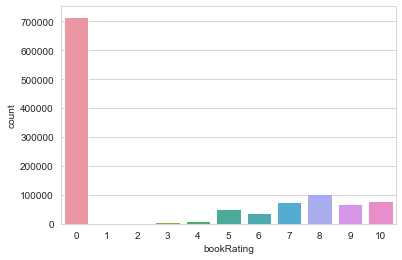

In [14]:
sns.countplot(ratings['bookRating'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

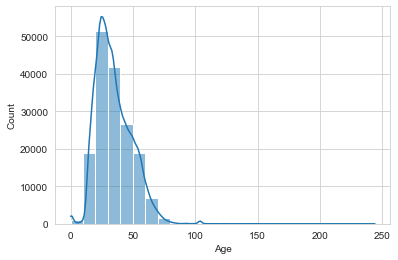

In [29]:
sns.histplot(users['Age'], kde= True, bins=[0,10,20,30,40,50,60,70,80,90,100] )

In [25]:
users['Age'].sort_values(ascending=False).head()

20856    244.0
8781     239.0
58285    237.0
1578     231.0
8457     230.0
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age'>

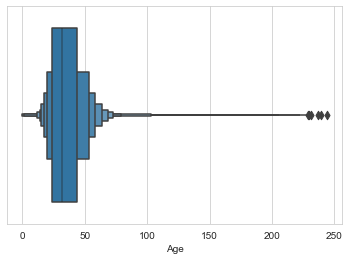

In [26]:
sns.boxenplot(users['Age'])

In [36]:
ratings.groupby(by='userID')['bookRating'].count().sort_values(ascending = False).head(10)

userID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
Name: bookRating, dtype: int64

In [37]:
counts1 = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 200].index)]
counts = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(counts[counts >= 100].index)]

In [38]:
combine_book_rating = pd.merge(ratings, books, on='ISBN')
combine_book_rating.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...


In [39]:
columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...


In [45]:
combine_book_rating.groupby(by='bookTitle')['bookRating'].count().sort_values(ascending = False).head(3)

bookTitle
Wild Animus                  365
Bridget Jones's Diary        278
The Lovely Bones: A Novel    272
Name: bookRating, dtype: int64

In [47]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

book_ratingCount = (combine_book_rating.
     groupby(by = ['bookTitle'])['bookRating'].
     count().
     reset_index().
     rename(columns = {'bookRating': 'totalRatingCount'})
     [['bookTitle', 'totalRatingCount']]
    )
book_ratingCount.sort_values(by='totalRatingCount' , ascending = False).head()

,bookTitle,totalRatingCount
156613,Wild Animus,365
19172,Bridget Jones's Diary,278
130477,The Lovely Bones: A Novel,272
133147,The Notebook,242
134156,The Pelican Brief,236


In [48]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
rating_with_totalRatingCount.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


In [50]:
rating_with_totalRatingCount = rating_with_totalRatingCount[['userID', 'ISBN',  'bookTitle','bookRating', 'totalRatingCount']] 

In [51]:
rating_with_totalRatingCount.head()

,userID,ISBN,bookTitle,bookRating,totalRatingCount
0,277427,002542730X,Politically Correct Bedtime Stories: Modern Ta...,10,82
1,3363,002542730X,Politically Correct Bedtime Stories: Modern Ta...,0,82
2,11676,002542730X,Politically Correct Bedtime Stories: Modern Ta...,6,82
3,12538,002542730X,Politically Correct Bedtime Stories: Modern Ta...,10,82
4,13552,002542730X,Politically Correct Bedtime Stories: Modern Ta...,0,82


In [60]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe(percentiles = np.arange(0.80,1,.02)))

count   160576.000
mean         3.044
std          7.428
min          1.000
50%          1.000
80%          3.000
82%          3.000
84%          4.000
86%          4.000
88%          5.000
90%          5.000
92%          7.000
94%          8.000
96%         11.000
98%         19.000
max        365.000
Name: totalRatingCount, dtype: float64


In [61]:
popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,userID,ISBN,bookTitle,bookRating,totalRatingCount
0,277427,002542730X,Politically Correct Bedtime Stories: Modern Ta...,10,82
1,3363,002542730X,Politically Correct Bedtime Stories: Modern Ta...,0,82
2,11676,002542730X,Politically Correct Bedtime Stories: Modern Ta...,6,82
3,12538,002542730X,Politically Correct Bedtime Stories: Modern Ta...,10,82
4,13552,002542730X,Politically Correct Bedtime Stories: Modern Ta...,0,82


In [62]:
rating_popular_book.shape

(62149, 5)

## Implementing KNN

In [65]:
rating_popular_book.isnull().sum()

userID              0
ISBN                0
bookTitle           0
bookRating          0
totalRatingCount    0
dtype: int64

In [66]:
rating_popular_book.drop_duplicates(['userID' , 'bookTitle'] , inplace= True)
print(rating_popular_book.shape)

(60141, 5)


In [67]:
from scipy.sparse import csr_matrix
rating_popular_book_pivot = rating_popular_book.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)

In [68]:
rating_popular_book_pivot.head()

userID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
bookTitle,,,,,,,,,,,,,,,,,,,,,
1984,9.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1st to Die: A Novel,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2nd Chance,0.000,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4 Blondes,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
84 Charing Cross Road,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,10.000,0.000,0.000,0.000,0.000


In [69]:
rating_popular_book_matrix = csr_matrix(rating_popular_book_pivot.values)

In [70]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(rating_popular_book_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [83]:
query_index = np.random.choice(rating_popular_book_pivot.shape[0])
print(query_index)

537


In [84]:
rating_popular_book_pivot.iloc[query_index,:].values.reshape(1,-1)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  9.,  0.,  7.,  0.,  0.,  9.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.,
        10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.,
         0.,  0.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

In [85]:
distances, indices = model_knn.kneighbors(rating_popular_book_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [86]:
rating_popular_book_pivot.index[query_index]

"The Color of Water: A Black Man's Tribute to His White Mother"

In [87]:

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(rating_popular_book_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, rating_popular_book_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for The Color of Water: A Black Man's Tribute to His White Mother:

1: Saint Maybe, with distance of 0.7837342277233366:
2: Blue Diary, with distance of 0.7866222596856216:
3: Jemima J: A Novel About Ugly Ducklings and Swans, with distance of 0.7887343365905916:
4: Brave New World, with distance of 0.7949614893777638:
5: I Know This Much Is True, with distance of 0.8016366323355475:


In [89]:
rating_popular_book_pivot.index.tolist()

['1984',
 '1st to Die: A Novel',
 '2nd Chance',
 '4 Blondes',
 '84 Charing Cross Road',
 'A Bend in the Road',
 'A Case of Need',
 'A Child Called \\It\\": One Child\'s Courage to Survive"',
 'A Civil Action',
 'A Cry In The Night',
 'A Darkness More Than Night',
 'A Day Late and a Dollar Short',
 'A Fine Balance',
 'A Great Deliverance',
 'A Heartbreaking Work of Staggering Genius',
 'A Is for Alibi (Kinsey Millhone Mysteries (Paperback))',
 'A Lesson Before Dying (Vintage Contemporaries (Paperback))',
 'A Man Named Dave: A Story of Triumph and Forgiveness',
 'A Man in Full',
 'A Map of the World',
 'A Painted House',
 'A Patchwork Planet',
 'A Prayer for Owen Meany',
 'A Thin Dark Line (Mysteries &amp; Horror)',
 "A Thousand Acres (Ballantine Reader's Circle)",
 'A Time to Kill',
 "A Virtuous Woman (Oprah's Book Club (Paperback))",
 'A Walk to Remember',
 'A Widow for One Year',
 'A Wrinkle In Time',
 'A Wrinkle in Time',
 'A Year in Provence',
 "ANGELA'S ASHES",
 'Abduction',
 'Abou

In [102]:
#book by Nicholas Sparks
book_name = 'A Walk to Remember'

In [103]:
distances, indices = model_knn.kneighbors(rating_popular_book_pivot.loc[book_name,:].values.reshape(1, -1), n_neighbors = 6)

In [104]:

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(rating_popular_book_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, rating_popular_book_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for The Color of Water: A Black Man's Tribute to His White Mother:

1: The Rescue, with distance of 0.5237347567047577:
2: Nights in Rodanthe, with distance of 0.6739057506875832:
3: The Notebook, with distance of 0.6953233784738966:
4: Message in a Bottle, with distance of 0.7076617451533092:
5: Granny Dan, with distance of 0.7131056115600168:
